In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind

from nose.tools import *

# Analysis of COVID-19 data from Bulgaria

## Is COVID-19 the likely cause of excess deaths in 2020 in the country?

### Introduction

#### New virus emerges in China

In early January 2020 the news of a novel virus causing a pneumonia-like illness since December 2019 in Wuhan City, Hubei Province of China started circulating the world. A few days later the draft genome of the virus was published and scientists identified it as a new coronavirus. The outbreak started worsening fast. By January 21 the United States confirmed its first case and on January 28 the first human-to-human transmission outside China was reported - there were cases of people in Germany, Vietnam and Japan who were in contact with people who had been in Wuhan. On January 30 the World Health Organization declared global emergency.

By the end of February 2020 countries all around the world started reporting their first cases and on March 8 the World Health Organization reported more than 100 000 confirmed cases across more than 100 countries and territories, Bulgaria being one of them. A few days later, on March 11, the World Health Organization declared the coronavirus outbreak a pandemic.

#### The new coronavirus reaches Bulgaria

The following months the whole world was under lockdown, while hospitals were on the verge of collapse. Luckily the first wave in Bulgaria was really weak compared to the suffering some European countries had to go through, with Italy probably being the worst.

As summer came, cases in Bulgaria seemed to have been kept to a reasonable number and with just few restrictions left, people started hoping for normal living again. But then autumn came and because of the series of wrong decisions and delayement on strict measures the pandemic hit the healthcare system hard. And the worst part was this wasn't even the worst the country would see. Just as cases started to drop in January after the lockdown, the third wave arrived and so did the Alpha and later on the Beta variants of the virus. The next couple of months seemed to have been the hardest so far.

Vaccination was introduced in Bulgaria in late December 2020 with a somewhat of a vaccination plan. Few people were eager to get the shot and by June 2021 most of them had finished their vaccination cycle. At the moment the number of fully vaccinated people among the adult population in the country is around 20%.

#### What's to come

Autumn approaches and with it the start of the new school year. So far the situation is devoloping almost exactly the same as it did last year. Which is unfortunately bad. With just 20% of the adult population being vaccinated and nearly 100% of new cases being the highly transmissible new Delta variant, it is even worse.

Hopefully the authorities will take action quicker this time and unvaccinated people will reconsider their decision not to vaccinate.

### Project objective

Now let's go back to 2020. Compared to the years 2016-2019 at the end of 2020 there were more than 16 000 excess deaths. According to official reports around 8000 of those are caused by COVID-19 - the disease caused by the new coronavirus.

As many people have underestimated the virus from day one, there were various opinions on the COVID-19 mortality. It was thought by some that the seemingly high numbers of deaths due to the disease are just a way to scare the population and that it actually isn't that bad.

Now that we are in our second year into the pandemic, such claims can be easily inspected. In this project I investigate the hypothesis that the overwhelming majority of the excess deaths in Bulgaria for 2020 are likely caused by the virus. If this hypothesis is false, even if there are observable peaks in the COVID-19 deaths data plot, they won't correspond to any on the general deaths plot for 2020.

### COVID-19 data analysis

#### Cleaning the data

Before we could dive into the data we need to make sure that it is all cleaned up and tidy. I spent some time unsuccessfully searching for aggregated data for the COVID-19 cases in Bulgaria. After going through a couple of sources online, including the National Statistical Institute, I couldn't find anything in a useful format so I decided to use an excel table I started filling in manually for myself around a year ago.

And so, the following data is personally gathered from the official Bulgarian [information portal](https://coronavirus.bg/bg/) for COVID-19 related data.

In [3]:
covid_data = pd.read_excel('data/Covid19_stats.xlsx')
covid_data

,ден,дата,положителни проби,общо проби,% положителни,медицински лица,хоспитализирани,в интензивно отделение,починали,излекувани,поставени ваксини
0,NaN,до 07.04.2020,565,NaN,NaN,31,NaN,NaN,23.0,42.0,NaN
1,В,2020-04-07 00:00:00,16,NaN,NaN,1,213.0,21.0,NaN,NaN,NaN
2,Ср,2020-04-08 00:00:00,30,NaN,NaN,1,233.0,27.0,1.0,6.0,NaN
3,Ч,2020-04-09 00:00:00,13,NaN,NaN,0,230.0,33.0,0.0,6.0,NaN
4,Пт,2020-04-10 00:00:00,24,NaN,NaN,3,231.0,32.0,2.0,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
496,Н,2021-08-15 00:00:00,272,6358.0,0.042781,2,1548.0,141.0,5.0,178.0,2186.0
497,Пон,2021-08-16 00:00:00,1301,29690.0,0.043819,11,1658.0,145.0,32.0,246.0,9143.0
498,В,2021-08-17 00:00:00,1405,21906.0,0.064138,23,1832.0,160.0,19.0,160.0,12219.0
499,Ср,2021-08-18 00:00:00,1387,20072.0,0.069101,12,2001.0,174.0,16.0,235.0,12807.0


Even though the first two cases of the virus in Bulgaria were [reported](https://bnr.bg/post/101237668/potvardeni-sa-dva-sluchaa-na-koronavirus-v-balggaria) on March 8, 2020, the [first report](https://coronavirus.bg/bg/news/41) of cases in the official portal appears on April 8, 2020. In my dataset this one month period is added as the data until April 7. For that period the total number of cases was 565. Of those 23 have died and 42 recovered.

Because it is not represented as the rest of the data, I will remove this row from my datatset.

I will also rename the columns and write them in a more pythonic way. Below are the new column names and information regarding each one:
- `dow`: day of the week
- `date`
- `cases`: number of cases for the day
- `tests`: number of tests for the day
- `cases_pct`: percentage of cases for the day
- `health_workers`: number of cases among health workers for the day
- `hospitalized`: number of hospitalized people
- `icu`: number of people in ICU (from those who are hospitalized)
- `deaths`: number of deaths for the day
- `recovered`: number of recovered* people for the day
- `vaccines`: number of administered vaccine doses for the day

The day of the week is included because there are obviously lower numbers for Saturdays and Sundays compared to the rest of the week.

\* According to [officials](https://www.dnevnik.bg/bulgaria/2020/11/15/4137950_izlekuvan_ot_covid-19_-_kak_se_broiat_ozdravelite_i/) recovered people are those who have been released from hospital and have two consecutive negative PCR results or those who had tested positive for COVID-19 and had been under quarantine for 14 days.

In [4]:
covid_data = covid_data.drop(0)
covid_data.columns = ['dow', 'date', 'cases', 'tests', 'cases_pct', 'health_workers',
                     'hospitalized', 'icu', 'deaths', 'recovered', 'vaccines']

In [5]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   dow             500 non-null    object 
 1   date            500 non-null    object 
 2   cases           500 non-null    int64  
 3   tests           478 non-null    float64
 4   cases_pct       478 non-null    float64
 5   health_workers  500 non-null    int64  
 6   hospitalized    494 non-null    float64
 7   icu             493 non-null    float64
 8   deaths          499 non-null    float64
 9   recovered       499 non-null    float64
 10  vaccines        236 non-null    float64
dtypes: float64(7), int64(2), object(2)
memory usage: 46.9+ KB


Now let's replace the Bulgarian abbreviation for the days of the week with their full names in English and transform the dates to datetime. Also multiply the values in `cases_pct` column by 100 so they represent actual percentage.

In [6]:
covid_data['dow'].replace({'Пон': 'Monday', 'В': 'Tuesday', 'Ср': 'Wednesday', 'Ч': 'Thursday',
                                        'Пт': 'Friday', 'С': 'Saturday', 'Н': 'Sunday'}, inplace=True)


In [7]:
covid_data['date'] = pd.to_datetime(covid_data['date'])

In [8]:
covid_data['cases_pct'] = covid_data['cases_pct'] * 100
covid_data

,dow,date,cases,tests,cases_pct,health_workers,hospitalized,icu,deaths,recovered,vaccines
1,Tuesday,2020-04-07,16,NaN,NaN,1,213.0,21.0,NaN,NaN,NaN
2,Wednesday,2020-04-08,30,NaN,NaN,1,233.0,27.0,1.0,6.0,NaN
3,Thursday,2020-04-09,13,NaN,NaN,0,230.0,33.0,0.0,6.0,NaN
4,Friday,2020-04-10,24,NaN,NaN,3,231.0,32.0,2.0,8.0,NaN
5,Saturday,2020-04-11,21,NaN,NaN,0,230.0,35.0,2.0,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
496,Sunday,2021-08-15,272,6358.0,4.278075,2,1548.0,141.0,5.0,178.0,2186.0
497,Monday,2021-08-16,1301,29690.0,4.381947,11,1658.0,145.0,32.0,246.0,9143.0
498,Tuesday,2021-08-17,1405,21906.0,6.413768,23,1832.0,160.0,19.0,160.0,12219.0
499,Wednesday,2021-08-18,1387,20072.0,6.910124,12,2001.0,174.0,16.0,235.0,12807.0


We can see that there are columns with NaN values so let's go through each one and fix them.

Columns `deaths` and `recovered` both have one value which is NaN and we can see those are for the first row. Since it is at the beginning of the pandemic and the few following values are really small, I will replace the two NaNs with zeros.

In [9]:
covid_data['deaths'] = covid_data['deaths'].fillna(0)
covid_data['recovered'] = covid_data['recovered'].fillna(0)

Columns `hospitalized` and `icu` have almost the same number of NaN values so they probably are for the same dates.

In [10]:
covid_data[covid_data['icu'].isna()]

,dow,date,cases,tests,cases_pct,health_workers,hospitalized,icu,deaths,recovered,vaccines
7,Monday,2020-04-13,19,NaN,NaN,1,194.0,NaN,4.0,10.0,NaN
47,Saturday,2020-05-23,19,866.0,2.193995,0,NaN,NaN,4.0,32.0,NaN
49,Monday,2020-05-25,10,295.0,3.389831,0,NaN,NaN,0.0,18.0,NaN
52,Thursday,2020-05-28,8,1725.0,0.463768,0,NaN,NaN,2.0,51.0,NaN
53,Friday,2020-05-29,14,1353.0,1.034738,1,NaN,NaN,3.0,48.0,NaN
55,Sunday,2020-05-31,6,NaN,NaN,0,NaN,NaN,0.0,16.0,NaN
56,Monday,2020-06-01,19,1220.0,1.557377,1,NaN,NaN,4.0,83.0,NaN


We can see how the values for those columns change a few days before and a few days after and replace the NaN values with the mean for that period (say 3 days before and 3 days after the NaN for a full week).

In [11]:
covid_data[(47-4):(47+3)]

,dow,date,cases,tests,cases_pct,health_workers,hospitalized,icu,deaths,recovered,vaccines
44,Wednesday,2020-05-20,39,1912.0,2.039749,2,287.0,31.0,4.0,43.0,NaN
45,Thursday,2020-05-21,41,1450.0,2.827586,1,258.0,29.0,5.0,42.0,NaN
46,Friday,2020-05-22,36,1605.0,2.242991,3,258.0,29.0,1.0,39.0,NaN
47,Saturday,2020-05-23,19,866.0,2.193995,0,NaN,NaN,4.0,32.0,NaN
48,Sunday,2020-05-24,6,443.0,1.354402,1,235.0,20.0,0.0,22.0,NaN
49,Monday,2020-05-25,10,295.0,3.389831,0,NaN,NaN,0.0,18.0,NaN
50,Tuesday,2020-05-26,17,1557.0,1.091843,1,217.0,22.0,3.0,32.0,NaN


In [12]:
covid_data[(47-4):(47+3)]['hospitalized'].mean()

251.0

In [13]:
covid_data[(47-4):(47+3)]['icu'].mean()

26.2

This looks about right. Now let's take the indices for all the observations where both `hospitalized` and `icu` are NaN and create a function wich fills those values with the mean for the week surrounding each one.

In [14]:
hospitalized_icu_nan_indices = covid_data.index[covid_data['hospitalized'].isna()].tolist()

In [15]:
def fill_na_with_weeeks_mean(dataframe, column_name, index):
    value = dataframe[index-4:index+3][column_name].mean()
    return value

In [16]:
for idx in hospitalized_icu_nan_indices:
    covid_data.loc[idx, ('hospitalized')] = fill_na_with_weeeks_mean(covid_data, 'hospitalized', idx)
    covid_data.loc[idx, ('icu')] = fill_na_with_weeeks_mean(covid_data, 'icu', idx)

In [17]:
covid_data.loc[7, ('icu')] = fill_na_with_weeeks_mean(covid_data, 'icu', 7)

Let's test if we are ready with the NaN values of the two columns.

In [18]:
assert_false(covid_data['hospitalized'].isnull().values.any())
assert_false(covid_data['icu'].isnull().values.any())

Next is the `vaccines` column. The vaccination process in Bulgaria [started](https://coronavirus.bg/bg/news/1058) around the Christmas Holidays in 2020. This means the NaN values in this column should be before that and therefore should be zeros.

In [19]:
covid_data[covid_data['vaccines'].isna()]

,dow,date,cases,tests,cases_pct,health_workers,hospitalized,icu,deaths,recovered,vaccines
1,Tuesday,2020-04-07,16,NaN,NaN,1,213.0,21.0,0.0,0.0,NaN
2,Wednesday,2020-04-08,30,NaN,NaN,1,233.0,27.0,1.0,6.0,NaN
3,Thursday,2020-04-09,13,NaN,NaN,0,230.0,33.0,0.0,6.0,NaN
4,Friday,2020-04-10,24,NaN,NaN,3,231.0,32.0,2.0,8.0,NaN
5,Saturday,2020-04-11,21,NaN,NaN,0,230.0,35.0,2.0,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
260,Tuesday,2020-12-22,1799,6233.0,28.862506,98,6123.0,526.0,114.0,2424.0,NaN
261,Wednesday,2020-12-23,1615,6945.0,23.254140,65,5713.0,533.0,99.0,1375.0,NaN
262,Thursday,2020-12-24,772,3669.0,21.041156,10,5671.0,521.0,45.0,1215.0,NaN
263,Friday,2020-12-25,257,2072.0,12.403475,6,5580.0,512.0,50.0,1186.0,NaN


In [20]:
covid_data['vaccines'] = covid_data['vaccines'].fillna(0)

In [21]:
assert_false(covid_data['vaccines'].isnull().values.any())

Now with the tricky part. What's left as NaN are 22 values in the `tests` and `cases_pct` columns.

In [22]:
covid_data[covid_data['tests'].isna()]

,dow,date,cases,tests,cases_pct,health_workers,hospitalized,icu,deaths,recovered,vaccines
1,Tuesday,2020-04-07,16,NaN,NaN,1,213.0000,21.000000,0.0,0.0,0.0
2,Wednesday,2020-04-08,30,NaN,NaN,1,233.0000,27.000000,1.0,6.0,0.0
3,Thursday,2020-04-09,13,NaN,NaN,0,230.0000,33.000000,0.0,6.0,0.0
4,Friday,2020-04-10,24,NaN,NaN,3,231.0000,32.000000,2.0,8.0,0.0
5,Saturday,2020-04-11,21,NaN,NaN,0,230.0000,35.000000,2.0,6.0,0.0
6,Sunday,2020-04-12,7,NaN,NaN,0,230.0000,36.000000,3.0,3.0,0.0
7,Monday,2020-04-13,19,NaN,NaN,1,194.0000,33.666667,4.0,10.0,0.0
8,Tuesday,2020-04-14,40,NaN,NaN,2,218.0000,31.000000,1.0,20.0,0.0
9,Wednesday,2020-04-15,48,NaN,NaN,9,218.0000,31.000000,1.0,21.0,0.0
10,Thursday,2020-04-16,42,NaN,NaN,12,227.0000,37.000000,3.0,19.0,0.0


Twenty of those values are actually for the first twenty days since the start of the official cases reporting. As of April 28, 2020, the total number of tests is 45208 according to the [report](https://coronavirus.bg/bg/news/154) for that day. Even though I don't consider it to be entirely the right way to do this, the approach I choose is to take that number and divide it by the number of days from the first reported cases until April 28 - 50 days.

Since the remaining two NaN values are relatively close in time to the first, we will fill them with that value as well.

In [23]:
tests_first_days = 45208/50

In [24]:
covid_data['tests'] = covid_data['tests'].fillna(tests_first_days)

To fill the `cases_pct` column we just have to divide the number of cases by the number of tests for those dates and multiply it by 100.

In [25]:
covid_data['cases_pct'] = covid_data['cases_pct'].fillna(covid_data['cases']/covid_data['tests']*100)

In [26]:
assert_false(covid_data['tests'].isnull().values.any())
assert_false(covid_data['cases_pct'].isnull().values.any())

The last thing to do is convert all the floats, except for the `cases_pct` column, to integers.

In [27]:
covid_data = covid_data.astype({'tests': 'int64', 'hospitalized': 'int64', 'icu': 'int64',
                                'deaths': 'int64', 'recovered': 'int64', 'vaccines': 'int64'})

With that we have our data cleaned and ready to be analyzed.

#### Visualizing the data

Let's start by creating a function for plotting each column in order to see how it changes over time.

In [28]:
def plot_data(x_data, y_data, title, y_label):
    plt.figure(figsize=(20,10))
    plt.plot(x_data, y_data)

    plt.title(title)
    plt.xlabel('Dates')
    plt.ylabel(y_label)
    
    plt.grid()
    plt.show()

First we will see the distribution of new cases over time.

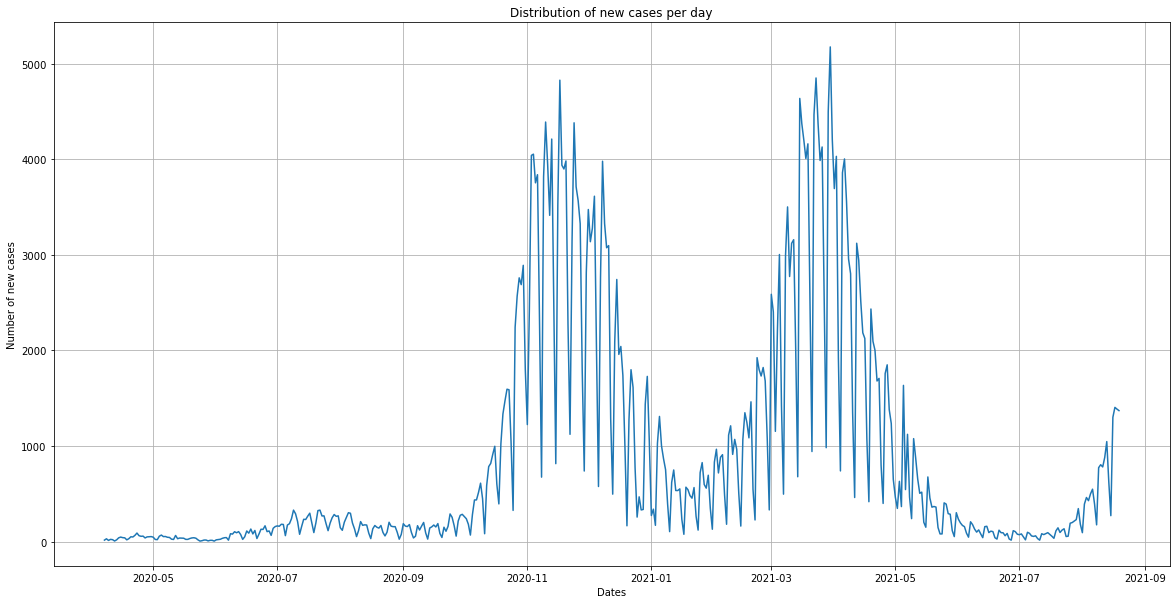

In [29]:
plot_data(covid_data['date'], covid_data['cases'], 'Distribution of new cases per day', 'Number of new cases')

When we visualize the data for a daily period we can observe some really low points between the high ones. That is because of the low number of testing and reporting during the weekend. For this reason, and because we will need it for the upcoming analysis in this project, it seems more useful to convert the data to a weekly period. This will be done for most columns, excluding `hospitalized` and `icu` columns since the values they represent are not the daily increase but the daily total in hospitals and intensive care units.

In [30]:
covid_data_7_day_period = covid_data.drop(columns=['dow', 'cases_pct', 'hospitalized', 'icu'])

In [31]:
covid_data_7_day_period = covid_data_7_day_period.set_index('date')
covid_data_7_day_period.index = pd.to_datetime(covid_data_7_day_period.index)

In [32]:
covid_data_7_day_period = covid_data_7_day_period.resample('W-SUN').sum()

Now let's see the same plot but on a weekly basis.

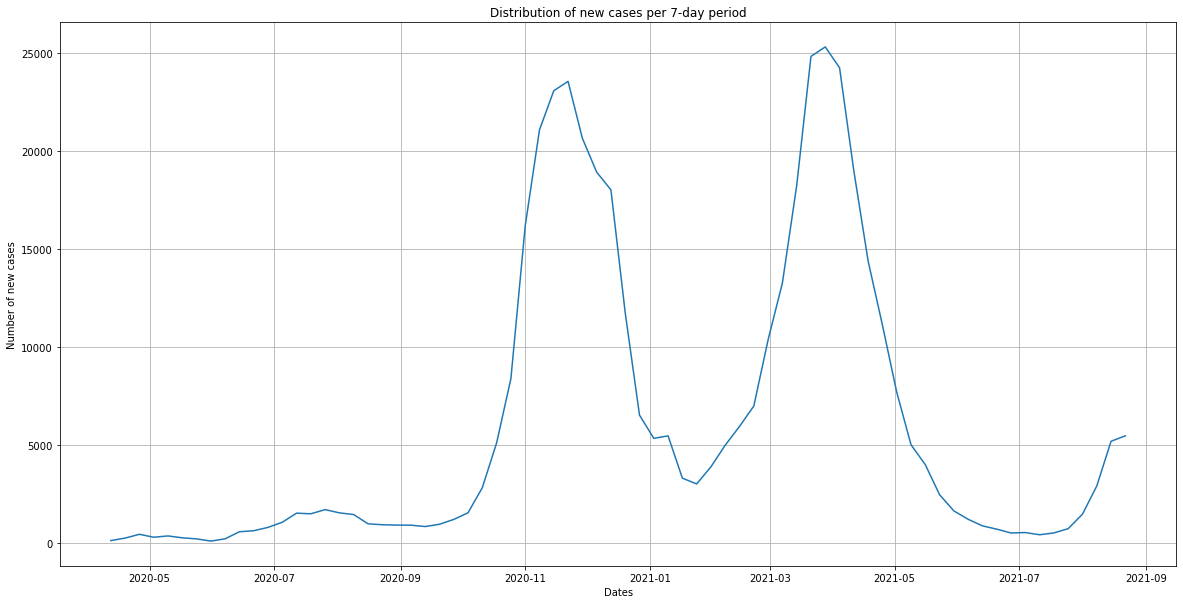

In [33]:
plot_data(covid_data_7_day_period.index, covid_data_7_day_period['cases'],
          'Distribution of new cases per 7-day period', 'Number of new cases')

This looks much better. The exception is the most recent week where the cases seem to go down which is not true if we compare this plot with the daily one. Actually that week contains only a few observations as it is not over yet.

What can be seen from both plots are the two very obvious peaks and a third one starting to form.

Even though the second peak is higher, were there more people infected during the second wave compared to the first? Let's separate the two waves and try to find out.

We will use the 7-day period dataset as the daily one has many min values and won't be of any use in this case.

Looking at the plot, the first wave started somewhere in late September 2020 and ended in late January 2021. It looks like the second one began almost immediately after and ended in late June 2021. Let's take as a beginning of the first wave the lowest point in September 2020 and the end would be the second lowest point in January 2021. The lowest point in January 2021 will be used as the beginning of the second wave. The end of the second wave will be the lowest point in June 2021.

In [34]:
first_wave_start_value = covid_data_7_day_period[covid_data_7_day_period.index.month == 9]['cases'].min()
first_wave_start_index = covid_data_7_day_period.index[covid_data_7_day_period['cases'] == first_wave_start_value][0]

In [35]:
first_wave_end_value = covid_data_7_day_period[covid_data_7_day_period.index.month == 1]['cases'].nsmallest(2)[1]
first_wave_end_index = covid_data_7_day_period.index[covid_data_7_day_period['cases'] == first_wave_end_value][0]

In [36]:
second_wave_start_value = covid_data_7_day_period[covid_data_7_day_period.index.month == 1]['cases'].nsmallest(2)[0]
second_wave_start_index = covid_data_7_day_period.index[covid_data_7_day_period['cases'] == second_wave_start_value][0]

In [37]:
second_wave_end_value = covid_data_7_day_period[
    (covid_data_7_day_period.index.month == 6) & (covid_data_7_day_period.index.year == 2021)]['cases'].min()
second_wave_end_index = covid_data_7_day_period.index[covid_data_7_day_period['cases'] == second_wave_end_value][0]

In [38]:
first_wave_data = covid_data_7_day_period[first_wave_start_index:first_wave_end_index]
second_wave_data = covid_data_7_day_period[second_wave_start_index:second_wave_end_index]

Finally we can rewrite the plotting function so it includes vertical lines, marking the beginning and end of the two waves.

In [39]:
def plot_data(x_data, y_data, title, y_label):
    plt.figure(figsize=(20,10))
    plt.plot(x_data, y_data)        

    plt.title(title)
    plt.xlabel('Dates')
    plt.ylabel(y_label)
    
    y_min, y_max = plt.gca().get_ylim()
    plt.vlines(x=[first_wave_start_index, first_wave_end_index], ymin=y_min, ymax=y_max, color='orange', label='First wave')
    plt.vlines(x=[second_wave_start_index, second_wave_end_index], ymin=y_min, ymax=y_max, color='green', label='Second wave')
    
    plt.legend()
    plt.grid()
    plt.show()

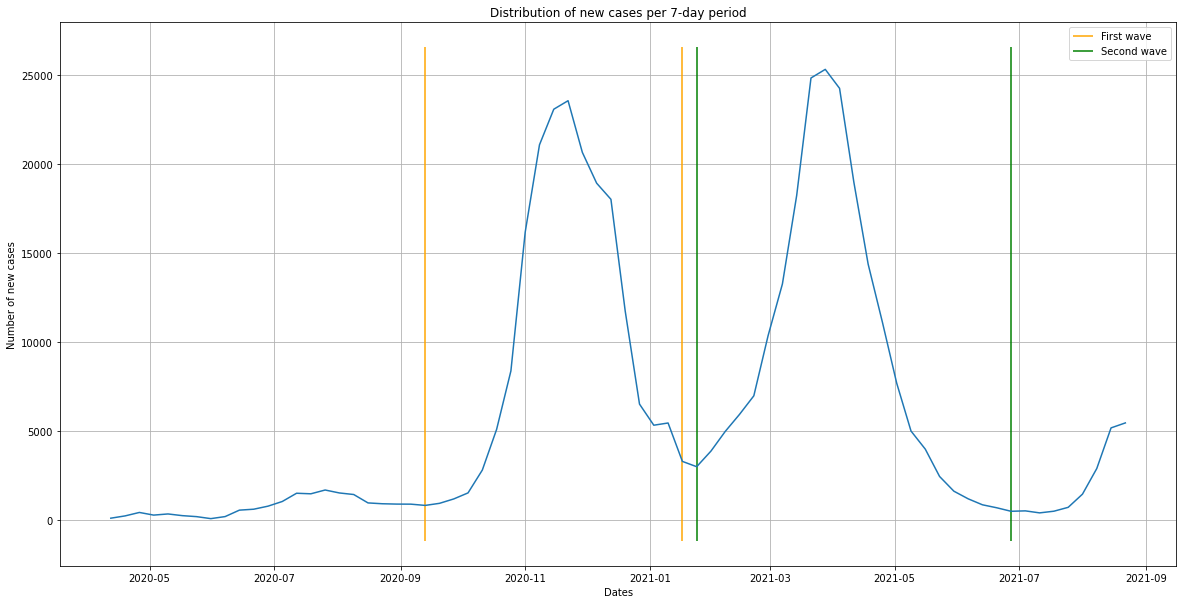

In [40]:
plot_data(covid_data_7_day_period.index, covid_data_7_day_period['cases'],
          'Distribution of new cases per 7-day period', 'Number of new cases')

And now to compare the total number of cases during the first and the second one.

In [41]:
print(f"The cases during the first wave were: {first_wave_data['cases'].sum()}")
print(f"The cases during the second wave were: {second_wave_data['cases'].sum()}")
if first_wave_data['cases'].sum() > second_wave_data['cases'].sum():
    print(f"The first wave had {100 - (second_wave_data['cases'].sum() / first_wave_data['cases'].sum()) * 100:.2f}% more cases.")
else:
    print(f"The second wave had {100 - (first_wave_data['cases'].sum() / second_wave_data['cases'].sum()) * 100:.2f}% more cases.")

The cases during the first wave were: 194724
The cases during the second wave were: 209666
The second wave had 7.13% more cases.


Now let's take a look at how many tests were done per day and for a 7-day period.

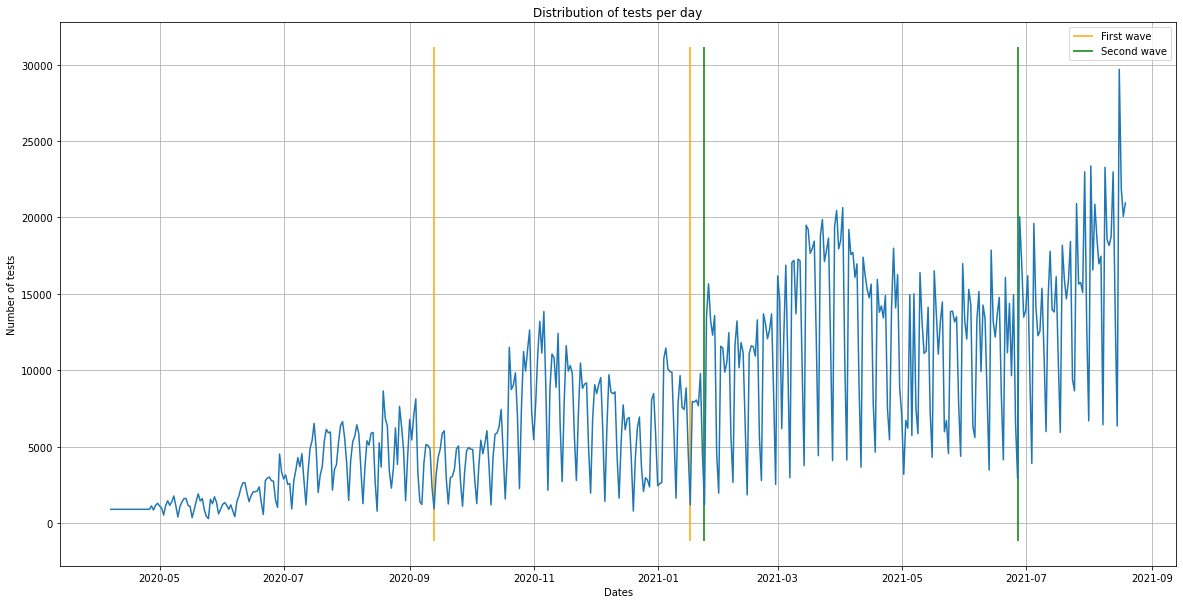

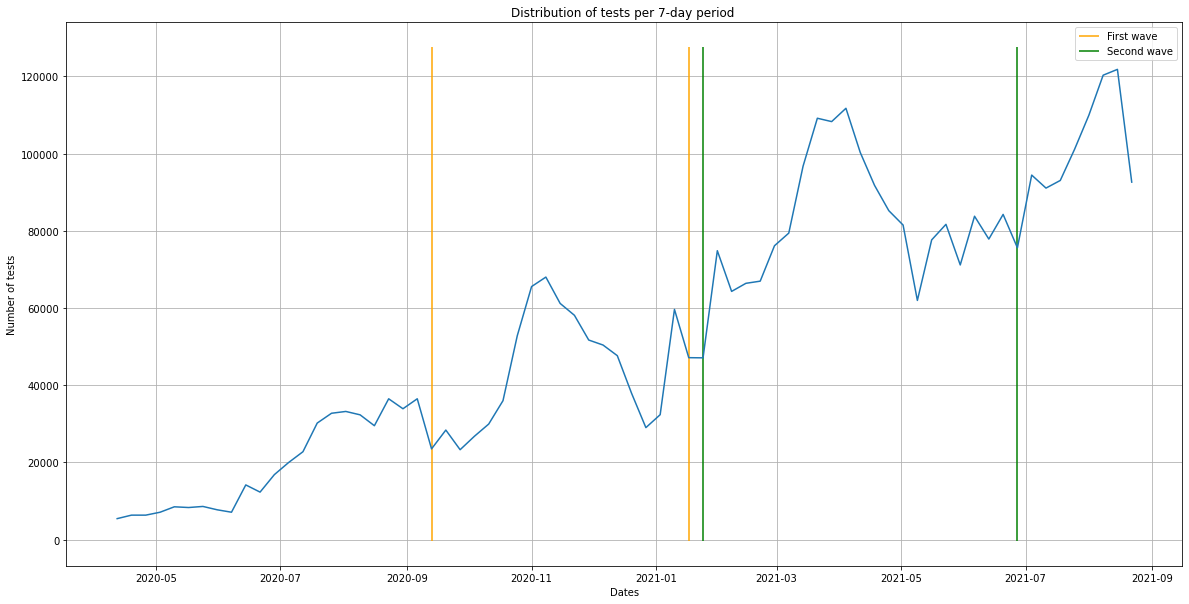

In [42]:
plot_data(covid_data['date'], covid_data['tests'], 'Distribution of tests per day', 'Number of tests')
plot_data(covid_data_7_day_period.index, covid_data_7_day_period['tests'],
          'Distribution of tests per 7-day period ', 'Number of tests')

Again the two peaks corresponding to the COVID-19 waves in the country are observable as well as the third one happening at the moment. What is also obvious is the increased number of overall tests done. That is probably in parts due to the availability of PCR tests and laboratories and laboratory staff capable of performing them as well as the decision to include the results from the rapid antigen tests in the official statistc.

Moving on to the data regarding the infected healthcare workers, again visualized both in a 1-day and 7-day period.

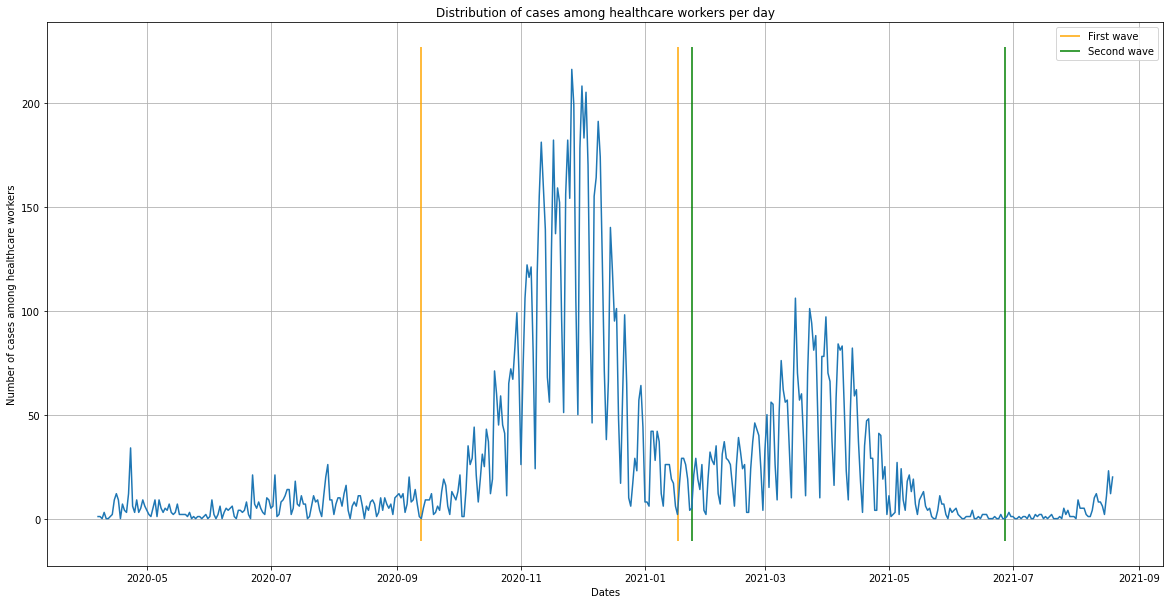

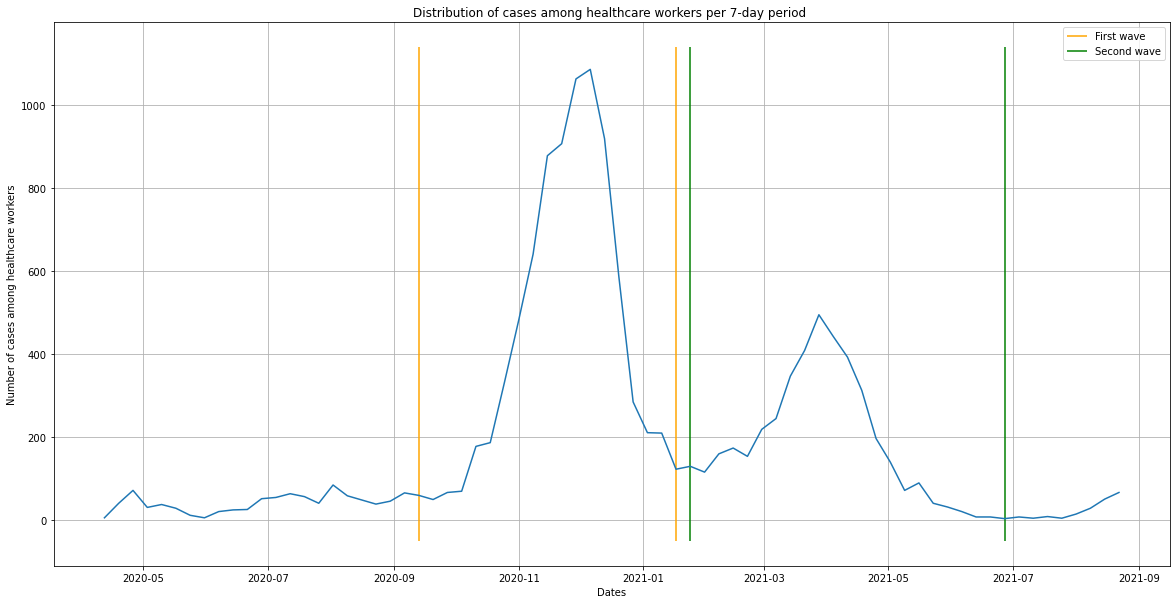

In [43]:
plot_data(covid_data['date'], covid_data['health_workers'],
          'Distribution of cases among healthcare workers per day', 'Number of cases among healthcare workers')
plot_data(covid_data_7_day_period.index, covid_data_7_day_period['health_workers'],
          'Distribution of cases among healthcare workers per 7-day period ', 'Number of cases among healthcare workers')

Let's compare the total number of infected health workers during the two waves, as we did earlier for the total number of cases.

In [44]:
print(f"The number of infected health workers during the first wave was: {first_wave_data['health_workers'].sum()}")
print(f"The number of infected health workers during the second wave was: {second_wave_data['health_workers'].sum()}")

The number of infected health workers during the first wave was: 8319
The number of infected health workers during the second wave was: 4188


Here we can see that during the first big wave of the pandemic there was a huge number of infected medical staff. The lower (but still quite high in my opinion) number during the second wave could be due to the fact that so many health workers had already been infected and also because medical staff were among the first to get the COVID vaccine in December 2020.

Let's see the change in number of people in hospitals and intensive care units.

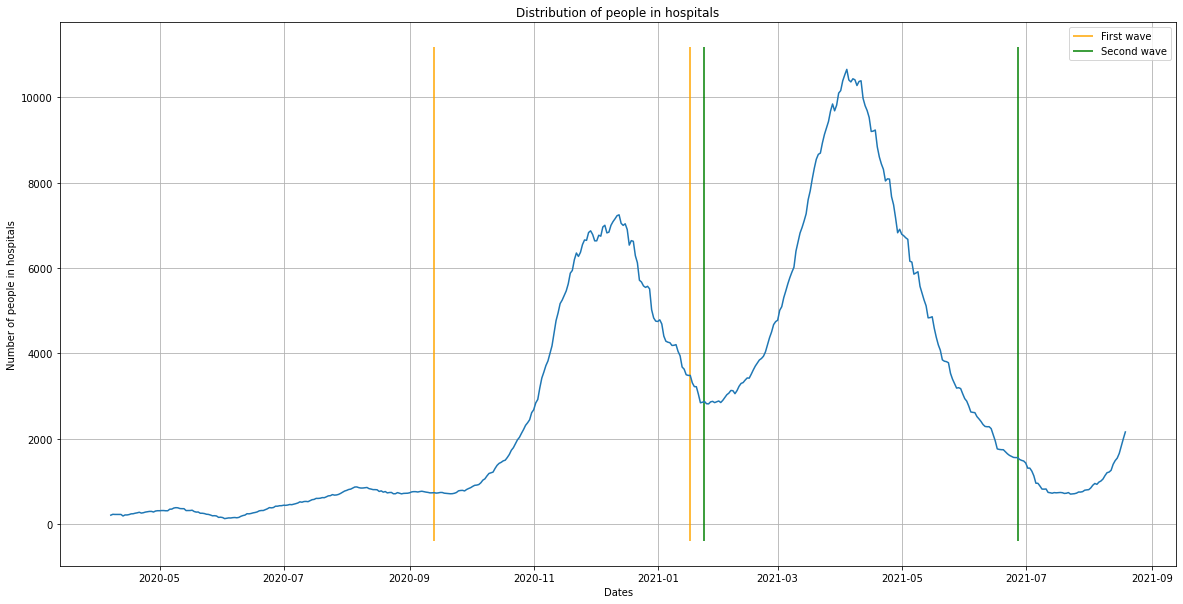

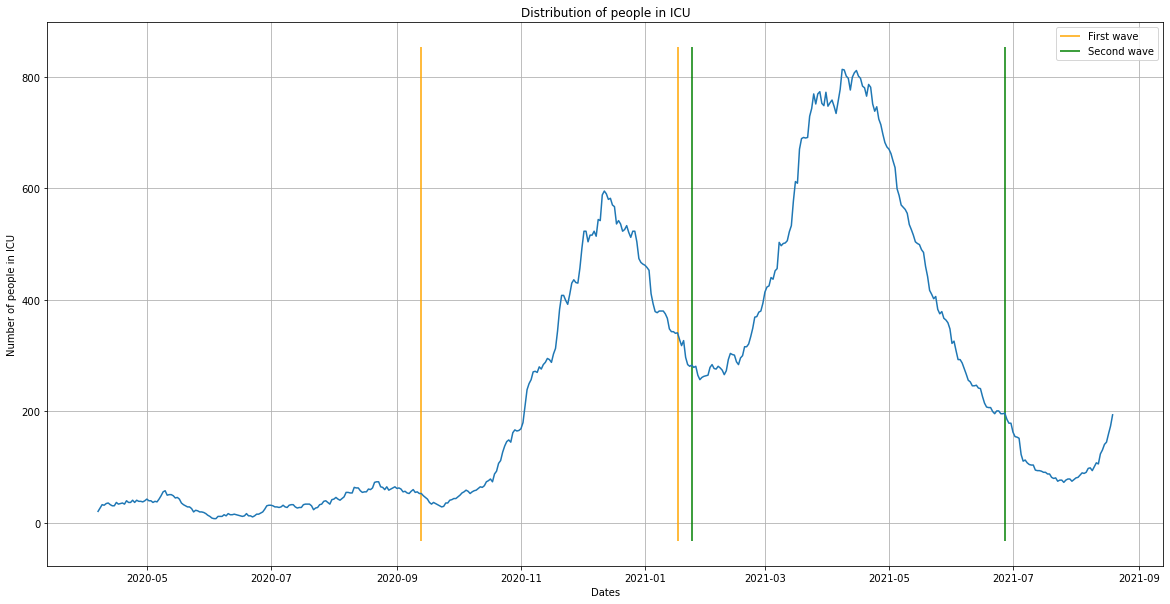

In [45]:
plot_data(covid_data['date'], covid_data['hospitalized'],
          'Distribution of people in hospitals', 'Number of people in hospitals')
plot_data(covid_data['date'], covid_data['icu'],
          'Distribution of people in ICU', 'Number of people in ICU')

First we can see that the beginnings and ends of the new cases waves don't seem to match with those for people in hospitals and ICUs. This is understandable because people don't fall ill immediately after testing positive for the virus (here denoted as having a new case), at least in most cases.

We can see that the second wave, which had more new cases, seems to have sent more people to the hospital and left more people needing intesive care. Probable reason might be the mutated forms of the virus present during the second big wave in the country.

And while we are at it, let's see the deaths per day and 7-day period.

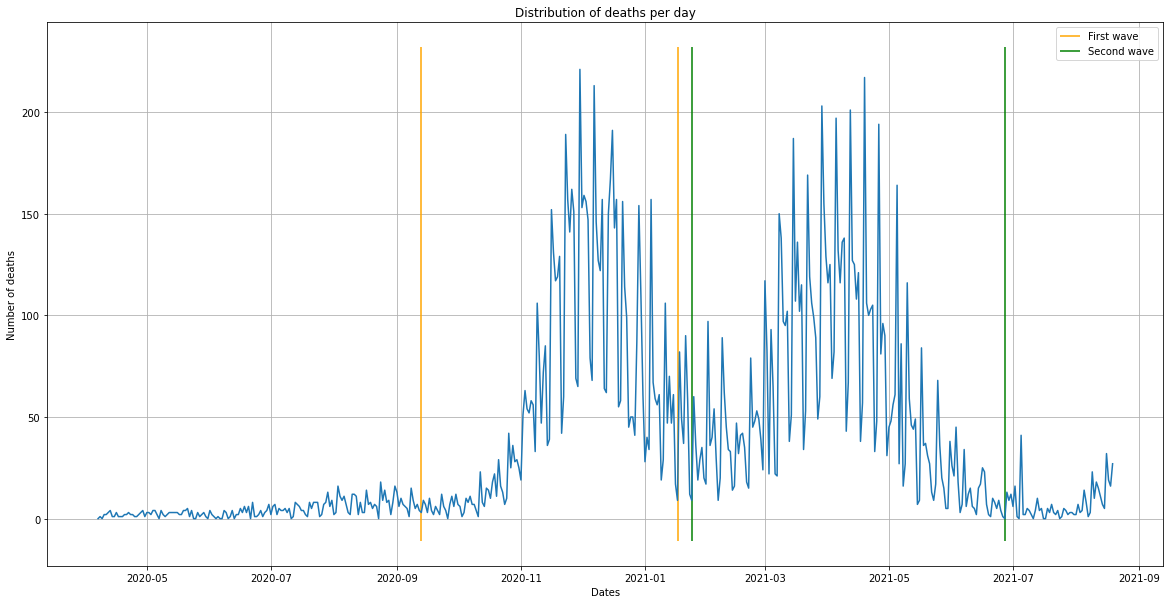

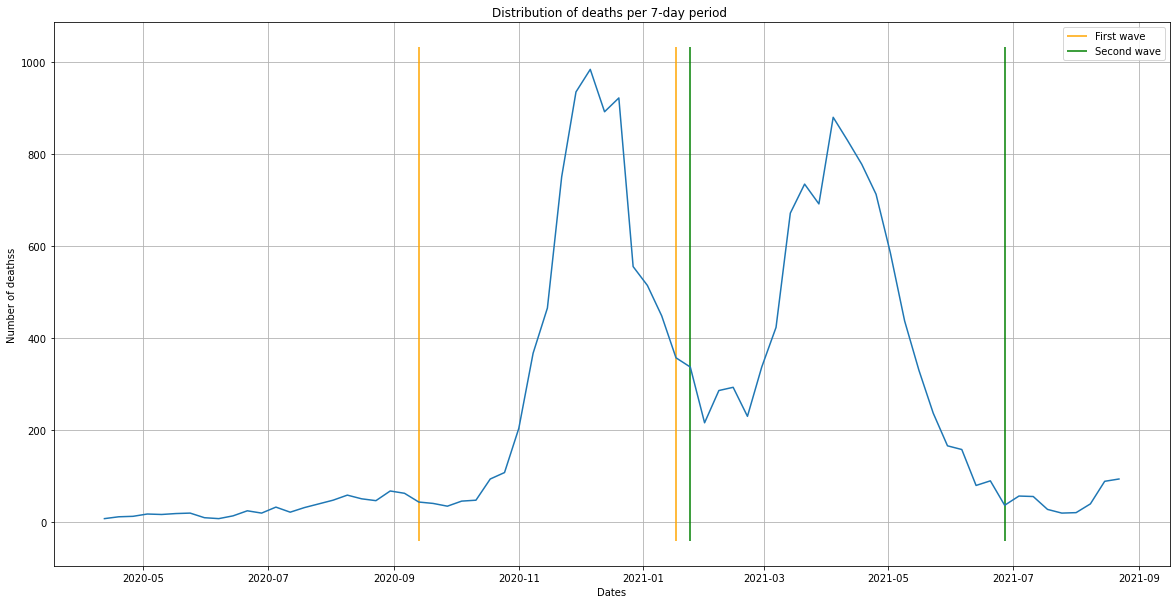

In [46]:
plot_data(covid_data['date'], covid_data['deaths'],
          'Distribution of deaths per day', 'Number of deaths')
plot_data(covid_data_7_day_period.index, covid_data_7_day_period['deaths'],
          'Distribution of deaths per 7-day period ', 'Number of deathss')

It looks like the first wave had a higher peak, but the second took more time. We can compare again the total number of deaths between the two waves but this time it can't be done with the already separated data. Similar to the hospital and ICU cases, the reason for that is it takes some time between the onset of symptoms (in our situation - having a new case) and death. Let's visualize it and try to separate the death waves.

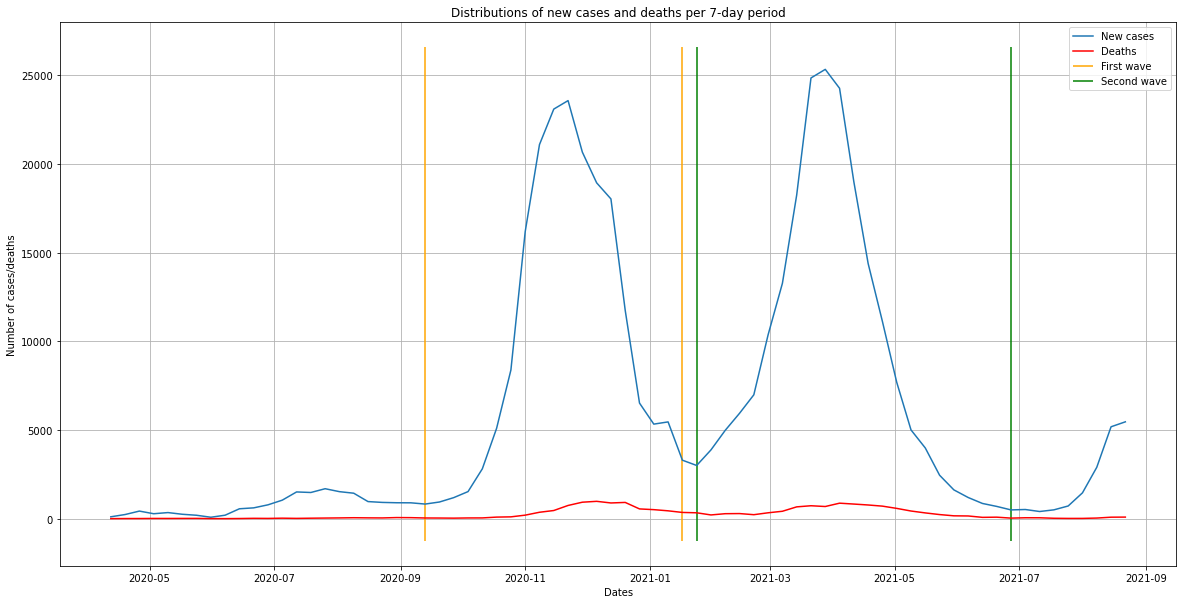

In [47]:
plt.figure(figsize=(20,10))
plt.plot(covid_data_7_day_period.index, covid_data_7_day_period['cases'], label='New cases')
plt.plot(covid_data_7_day_period.index, covid_data_7_day_period['deaths'], c='red', label='Deaths')

plt.title('Distributions of new cases and deaths per 7-day period')
plt.xlabel('Dates')
plt.ylabel('Number of cases/deaths')

y_min, y_max = plt.gca().get_ylim()
plt.vlines(x=[first_wave_start_index, first_wave_end_index], ymin=y_min, ymax=y_max, color='orange', label='First wave')
plt.vlines(x=[second_wave_start_index, second_wave_end_index], ymin=y_min, ymax=y_max, color='green', label='Second wave')    

plt.legend()
plt.grid()
plt.show()

Comparing the two plots like that is not very useful. Because of the low number of deaths compared to the number of cases, the line representing the deaths looks almost flat. Let's take $ln$ for the values in both columns and see what we will get.

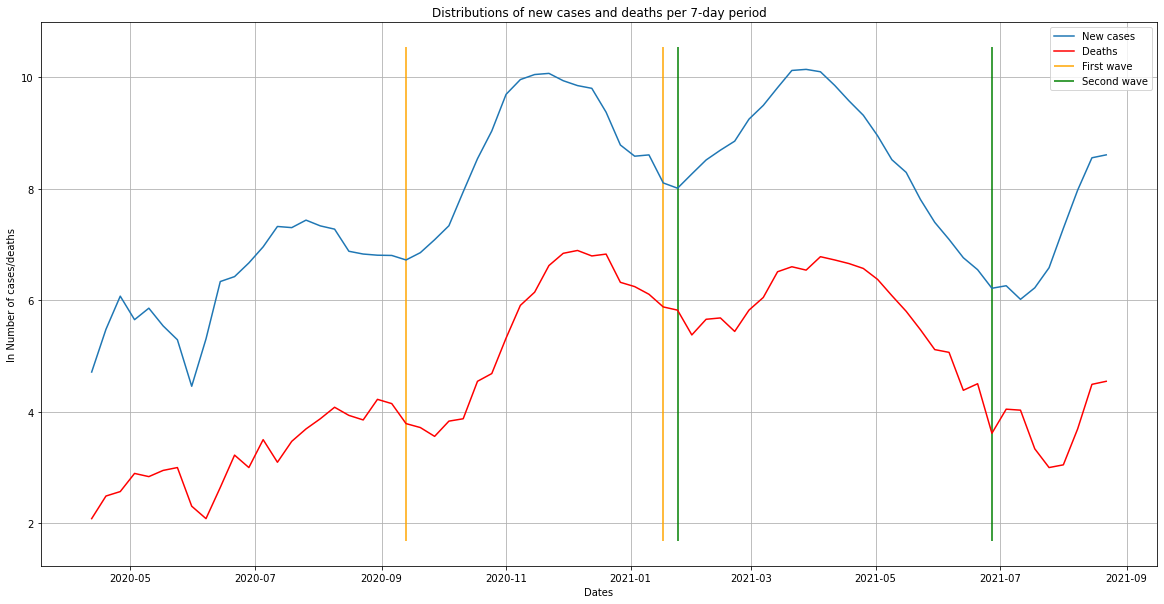

In [48]:
plt.figure(figsize=(20,10))
plt.plot(covid_data_7_day_period.index, np.log(covid_data_7_day_period['cases']), label='New cases')
plt.plot(covid_data_7_day_period.index, np.log(covid_data_7_day_period['deaths']), c='red', label='Deaths')

plt.title('Distributions of new cases and deaths per 7-day period')
plt.xlabel('Dates')
plt.ylabel('ln Number of cases/deaths')

y_min, y_max = plt.gca().get_ylim()
plt.vlines(x=[first_wave_start_index, first_wave_end_index], ymin=y_min, ymax=y_max, color='orange', label='First wave')
plt.vlines(x=[second_wave_start_index, second_wave_end_index], ymin=y_min, ymax=y_max, color='green', label='Second wave')    

plt.legend()
plt.grid()
plt.show()

Looking at the plot I would expect the start of the wave for the death cases to be somewhere between late September or early October 2020. Let's find the lowest point in that period.

In [49]:
first_death_wave_start_value = covid_data_7_day_period[
    (covid_data_7_day_period.index.month == 9) | (covid_data_7_day_period.index.month == 10)]['deaths'].min()
first_death_wave_start_index = covid_data_7_day_period.index[covid_data_7_day_period['deaths'] == first_death_wave_start_value][0]

In [50]:
print(f'Start of first wave: {first_wave_start_index}')
print(f'Start of first death wave: {first_death_wave_start_index}')

Start of first wave: 2020-09-13 00:00:00
Start of first death wave: 2020-09-27 00:00:00


We can see that the increase in death cases appears two weeks after the increase in new cases. It seems logical that the ends of the waves will also differ from each other with two weeks, but let's check that.

In [51]:
first_death_wave_end_value = covid_data_7_day_period[
    (covid_data_7_day_period.index.month == 1) | (covid_data_7_day_period.index.month == 2)]['deaths'].min()
first_death_wave_end_index = covid_data_7_day_period.index[covid_data_7_day_period['deaths'] == first_death_wave_end_value][0]

In [52]:
print(f'End of first wave: {first_wave_end_index}')
print(f'End of first death wave: {first_death_wave_end_index}')

End of first wave: 2021-01-17 00:00:00
End of first death wave: 2021-01-31 00:00:00


Similarly let's find the start and end of the second death wave. The start should be in late January or early February 2021 and the end probably around the middle of July 2021.

In [53]:
second_death_wave_start_value = covid_data_7_day_period[
    (covid_data_7_day_period.index.month == 1) & (covid_data_7_day_period.index.year == 2021) |
    (covid_data_7_day_period.index.month == 2) & (covid_data_7_day_period.index.year == 2021)]['deaths'].min()
second_death_wave_start_index = covid_data_7_day_period.index[covid_data_7_day_period['deaths'] == second_death_wave_start_value][0]

In [54]:
print(f'Start of second wave: {second_wave_start_index}')
print(f'Start of second death wave: {second_death_wave_start_index}')

Start of second wave: 2021-01-24 00:00:00
Start of second death wave: 2021-01-31 00:00:00


In [55]:
second_death_wave_end_value = covid_data_7_day_period[    
    (covid_data_7_day_period.index.month == 6) & (covid_data_7_day_period.index.year == 2021) |
    (covid_data_7_day_period.index.month == 7) & (covid_data_7_day_period.index.year == 2021)]['deaths'].min()
second_death_wave_end_index = covid_data_7_day_period.index[
    (covid_data_7_day_period.index.year == 2021) &
    (covid_data_7_day_period['deaths'] == second_death_wave_end_value)][0]

In [56]:
print(f'End of second wave: {second_wave_end_index}')
print(f'End of second death wave: {second_death_wave_end_index}')

End of second wave: 2021-06-27 00:00:00
End of second death wave: 2021-07-25 00:00:00


For the second wave we see a one week delay for the death wave to start but the difference in the end points is one month. This might mean cases were underreported at that time or it took longer for people to get worse and continue dying even when there were fewer cases.

In [57]:
first_death_wave_data = covid_data_7_day_period[first_death_wave_start_index:first_death_wave_end_index]
second_death_wave_data = covid_data_7_day_period[second_death_wave_start_index:second_death_wave_end_index]

Time to compare the number of deaths between the two waves.

In [58]:
print(f"The number of deaths during the first wave were: {first_death_wave_data['deaths'].sum()}")
print(f"The number of deaths during the second wave were: {second_death_wave_data['deaths'].sum()}")
if first_death_wave_data['deaths'].sum() > second_death_wave_data['deaths'].sum():
    print(f"The first wave had {100 - (second_death_wave_data['cases'].sum() / first_death_wave_data['cases'].sum()) * 100:.2f}% more cases.")
else:
    print(f"The second wave had {100 - (first_death_wave_data['cases'].sum() / second_death_wave_data['cases'].sum()) * 100:.2f}% more cases.")

The number of deaths during the first wave were: 8273
The number of deaths during the second wave were: 9359
The second wave had 4.30% more cases.


There are only two more features from our dataset to be visualized - the number of recovered people and the number of administerd vaccine doses.

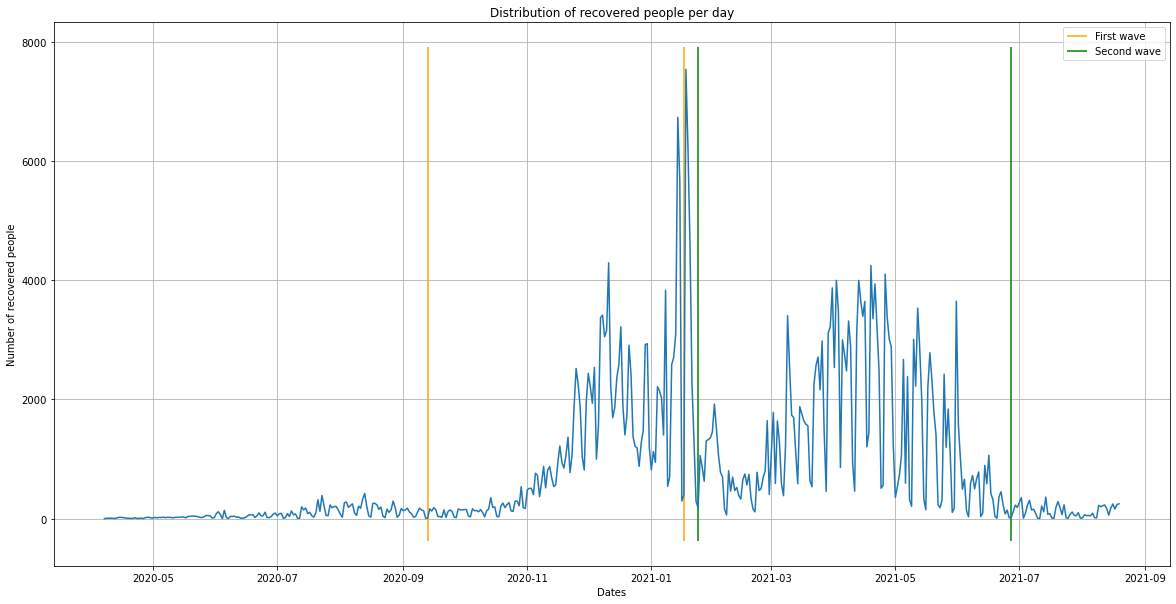

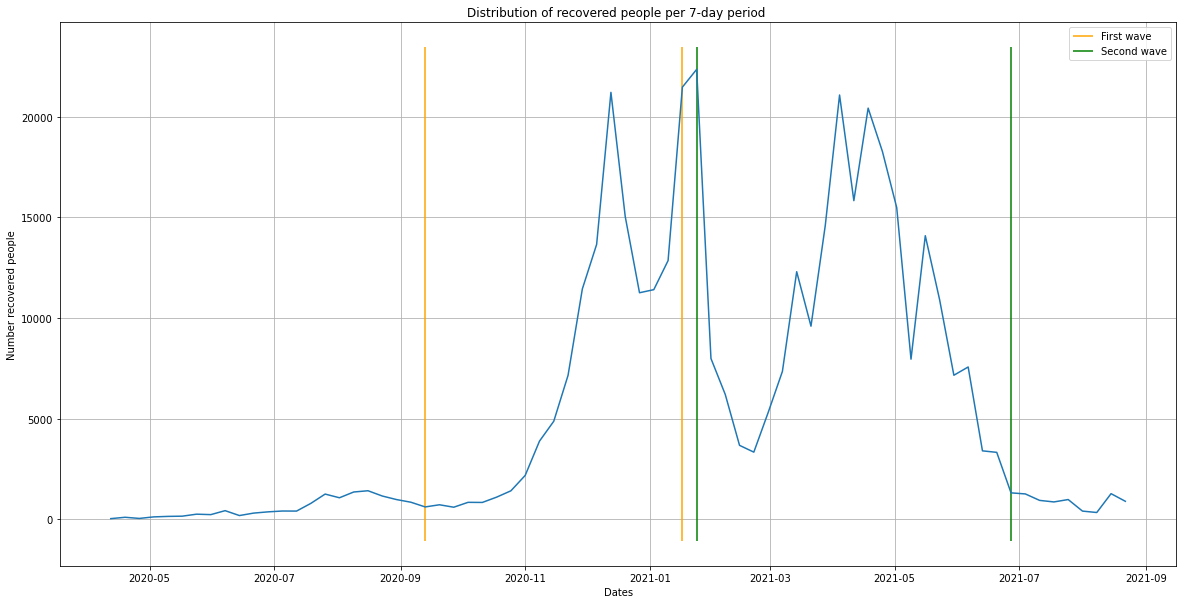

In [59]:
plot_data(covid_data['date'], covid_data['recovered'],
          'Distribution of recovered people per day', 'Number of recovered people')
plot_data(covid_data_7_day_period.index, covid_data_7_day_period['recovered'],
          'Distribution of recovered people per 7-day period ', 'Number recovered people')

The plot for recovered people looks really strange (even the 7-day period one) but maybe so is the definition of a "recovered" person which I cited at the beginning of this section when I presented the initial data. I find it hard to analyze this data so I will move on to the vaccines plot.

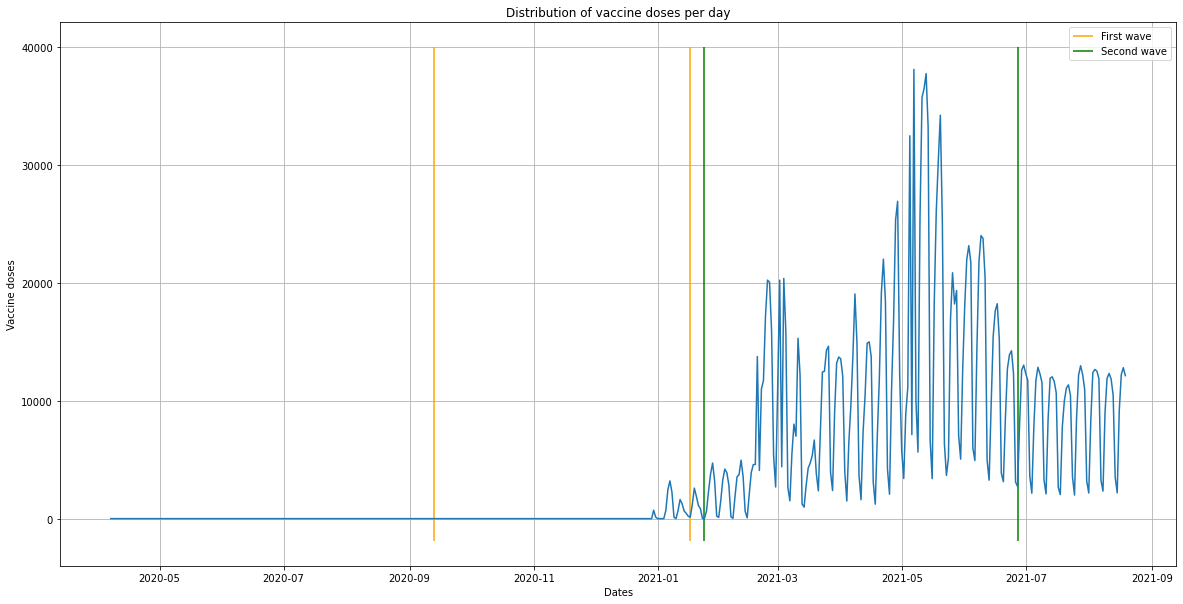

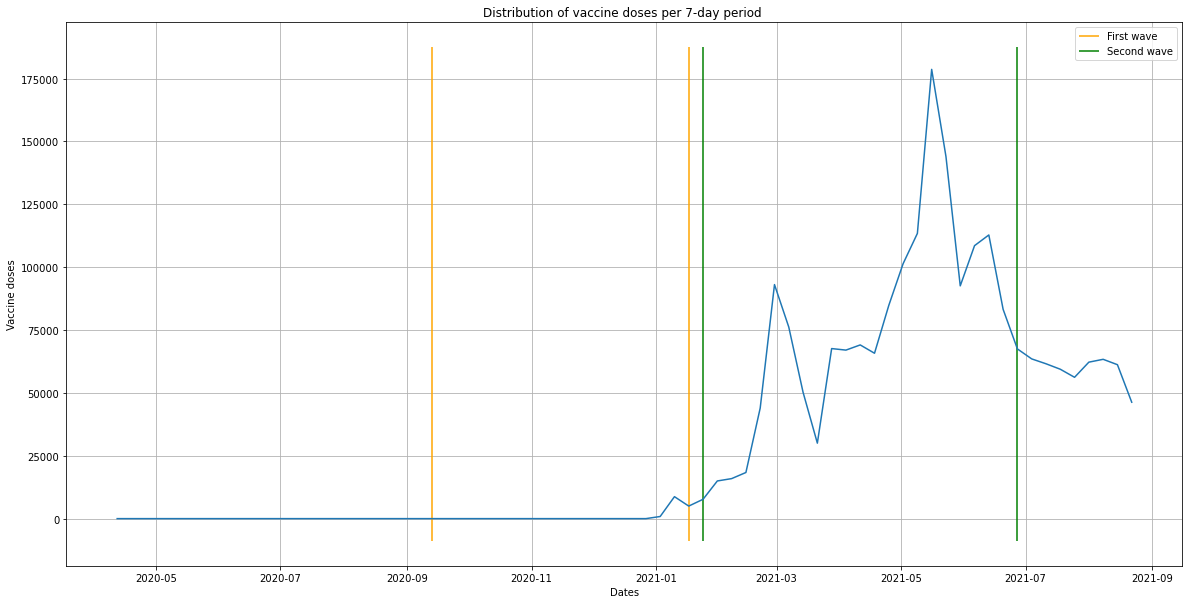

In [60]:
plot_data(covid_data['date'], covid_data['vaccines'],
          'Distribution of vaccine doses per day', 'Vaccine doses')
plot_data(covid_data_7_day_period.index, covid_data_7_day_period['vaccines'],
          'Distribution of vaccine doses per 7-day period ', 'Vaccine doses')

The result here is somewhat expected. As mentioned before, the vaccination in Bulgaria started in the end of December 2020. We see a steep decrease in March 2021 which is around the time when cases of thrombosis potentially associated with the AstraZeneca vaccine started to emerge. At that time the majority of people in the country were vaccinated with AstraZeneca and a [decision was made](https://coronavirus.bg/bg/vaccinations_news/1508) to pause the vacciantion. The steep increase coincides with the time most people were scheduled to have their second shot - 10 to 12 weeks after the first one for the AstraZeneca vaccine.

#### Comparing COVID-19 deaths data from 2020 and total deaths in Bulgaria for 2016-2020

The second dataset used in this project represents the number of deaths per week for the years 2016-2021. The data can be found on the [official website](https://www.nsi.bg/bg/content/18121/basic-page/%D1%83%D0%BC%D0%B8%D1%80%D0%B0%D0%BD%D0%B8%D1%8F-%D0%B2-%D0%B1%D1%8A%D0%BB%D0%B3%D0%B0%D1%80%D0%B8%D1%8F-%D0%BF%D0%BE-%D1%81%D0%B5%D0%B4%D0%BC%D0%B8%D1%86%D0%B8) of the National Statistical Institute from where it was downloaded.

Again the first thing to do will be to read and clean the data so that it can be visualized easily.

In [61]:
deaths_data_2016_2021 = pd.read_excel('data/Deaths_2016_2021.xlsx', header=1)
deaths_data_2016_2021

,Unnamed: 0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W44,W45,W46,W47,W48,W49,W50,W51,W52,W53
0,2016 (4.1.2016 - 1.1.2017),2441,2283,2280,2367,2303,2222,2103,2093,1957,...,2078,2141,2129,2096,2148,2299,2277,2435,2807,x
1,2017 (2.1.2017 - 31.12.2017),3174,3220,2817,2627,2526,2349,2357,2310,2141,...,2063,2014,2112,2072,2062,2021,2109,2041,2252,x
2,2018 (1.1.2018 - 30.12.2018),2274,2166,2374,2362,2564,2454,2381,2235,2468,...,2065,2074,2137,2163,2212,2319,2343,2345,2434,x
3,2019 (31.12.2018 - 29.12.2019),2530,2694,2754,2849,2574,2245,2300,2263,2273,...,2040,2194,2027,1954,2076,2126,2112,2136,2120,x
4,2020 (30.12.2019 - 3.01.2021),2111,2279,2185,2393,2439,2350,2310,2161,2183,...,2732,3236,3948,4407,4739,4753,4370,3945,3242,2962
5,2021 (04.01.2021 - 2.01.2022),2606,2476,2517,2444,2372,2355,2469,2569,2743,...,x,x,x,x,x,x,x,x,x,x


This table format is not really convenient so some transformations have to be done. The final goal is to have the weeks as indices and the years as columns.

First the unnamed column will be renamed to "week" and set as index. Next the whole table will be transposed and finally the column names will be changed to include just the year.

In [62]:
deaths_data_2016_2021 = deaths_data_2016_2021.rename(columns={'Unnamed: 0': 'week'})
deaths_data_2016_2021 = deaths_data_2016_2021.set_index('week')

deaths_data_2016_2021 = deaths_data_2016_2021.T

deaths_data_2016_2021.columns = ['2016', '2017', '2018', '2019', '2020', '2021']

In [63]:
deaths_data_2016_2021

,2016,2017,2018,2019,2020,2021
W1,2441,3174,2274,2530,2111,2606
W2,2283,3220,2166,2694,2279,2476
W3,2280,2817,2374,2754,2185,2517
W4,2367,2627,2362,2849,2393,2444
W5,2303,2526,2564,2574,2439,2372
W6,2222,2349,2454,2245,2350,2355
W7,2103,2357,2381,2300,2310,2469
W8,2093,2310,2235,2263,2161,2569
W9,1957,2141,2468,2273,2183,2743
W10,2091,2233,2384,2167,2049,3008


In [64]:
deaths_data_2016_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, W1 to W53
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   2016    53 non-null     object
 1   2017    53 non-null     object
 2   2018    53 non-null     object
 3   2019    53 non-null     object
 4   2020    53 non-null     object
 5   2021    53 non-null     object
dtypes: object(6)
memory usage: 2.9+ KB


It can be seen that there are some "x" values and that each column is of type object. First all "x" values will be replaced with zeros and then all other values will be converted to integers so they can be plotted.

In [65]:
deaths_data_2016_2021 = deaths_data_2016_2021.replace({'x': 0})
deaths_data_2016_2021 = deaths_data_2016_2021.astype('int64', errors='ignore')

In [66]:
deaths_data_2016_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, W1 to W53
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2016    53 non-null     int64
 1   2017    53 non-null     int64
 2   2018    53 non-null     int64
 3   2019    53 non-null     int64
 4   2020    53 non-null     int64
 5   2021    53 non-null     int64
dtypes: int64(6)
memory usage: 2.9+ KB


Now let's plot the data and see how it looks.

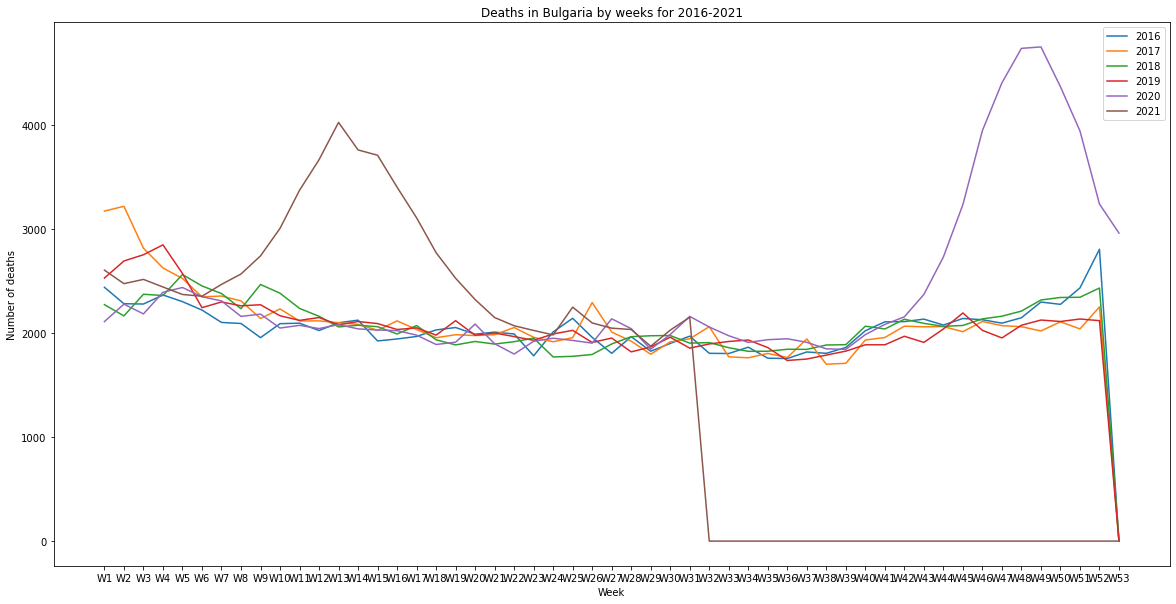

In [67]:
plt.figure(figsize=(20,10))
plt.plot(deaths_data_2016_2021.index, deaths_data_2016_2021['2016'], label='2016')
plt.plot(deaths_data_2016_2021.index, deaths_data_2016_2021['2017'], label='2017')
plt.plot(deaths_data_2016_2021.index, deaths_data_2016_2021['2018'], label='2018')
plt.plot(deaths_data_2016_2021.index, deaths_data_2016_2021['2019'], label='2019')
plt.plot(deaths_data_2016_2021.index, deaths_data_2016_2021['2020'], label='2020')
plt.plot(deaths_data_2016_2021.index, deaths_data_2016_2021['2021'], label='2021')

plt.title('Deaths in Bulgaria by weeks for 2016-2021')
plt.xlabel('Week')
plt.ylabel('Number of deaths')

plt.legend()
plt.show()

What is clear from this visualization are the two huge peaks. The one at the beginning of the year, which comes from deaths in 2021, and the one at the end - death in 2020. Since the data for 2021 is still incomplete, there are a lot of zeros at the end and the line looks the way it does. Also 2020 is the only year with 53 weeks and so all of the others have a value of zero for that week.

To make the visualization more clear let's plot the data only for 2019 and 2020.

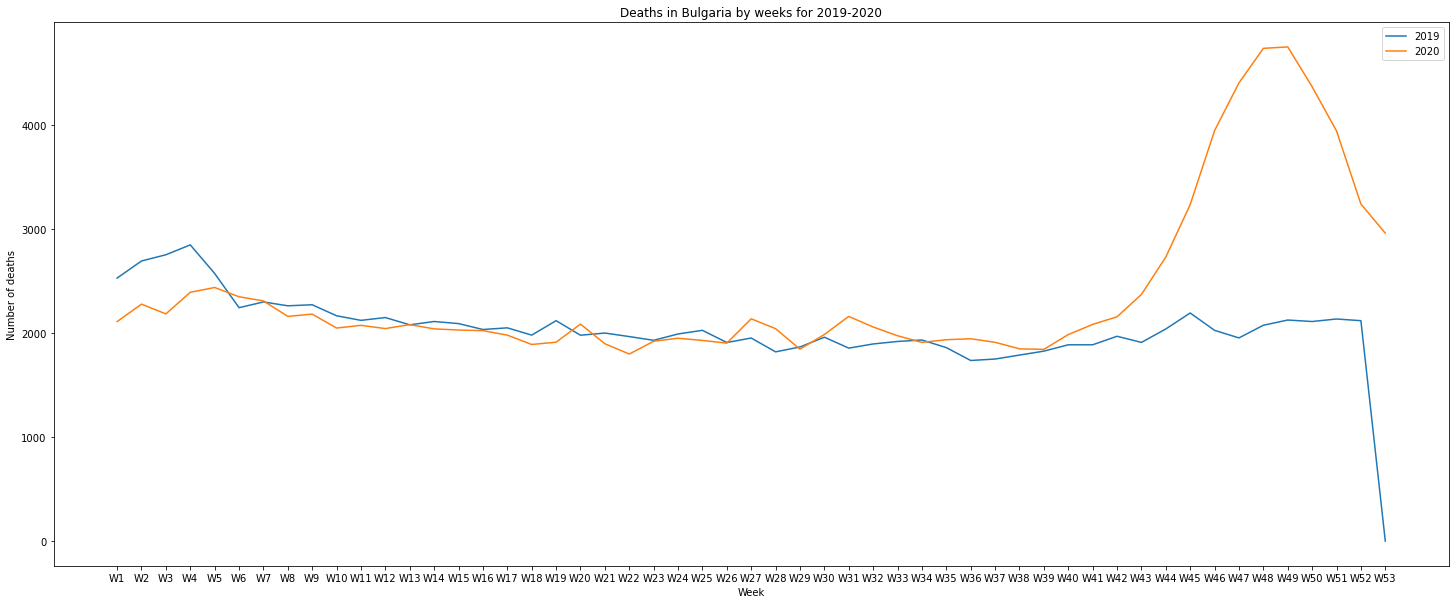

In [68]:
plt.figure(figsize=(25,10))

plt.plot(deaths_data_2016_2021.index, deaths_data_2016_2021['2019'], label='2019')
plt.plot(deaths_data_2016_2021.index, deaths_data_2016_2021['2020'], label='2020')

plt.title('Deaths in Bulgaria by weeks for 2019-2020')
plt.xlabel('Week')
plt.ylabel('Number of deaths')

plt.legend()
plt.show()

It seems that from week 27 the deaths in 2020 start to become more in numbers than those in 2019. The peak is around week 43 which coincides with the first big coronavirus wave.

Let's investigate what was the total number of deaths in 2020 compared to the expected number. In other words, let's see what is the excess deaths for that year.

In order to do that first the zeros for week 53 for the years 2016-2019 have to be filled. That will be done using the mean for each year.

In [69]:
def fill_w53_with_years_mean(year):
    return deaths_data_2016_2021[:'W52'][year].mean()    

In [70]:
for year in ['2016', '2017', '2018', '2019']:
    deaths_data_2016_2021.loc['W53', year] = fill_w53_with_years_mean(year)

Next the total number of deaths per year will be calculated as well as the mean for those sums. The mean will represent the expected number of deaths for 2020, the actual number will be the sum of all deaths for that year.

Finally the excess deaths will be calculated as the difference between the number of actual deaths in 2020 and the expected number of deaths.

In [71]:
sums_per_year = np.array([])
for year in ['2016', '2017', '2018', '2019']:
    sums_per_year = np.append(sums_per_year, deaths_data_2016_2021[year].sum())
    
expected_num_deaths_2020 = int(sums_per_year.mean())
actual_num_deaths_2020 = deaths_data_2016_2021['2020'].sum()

excess_deaths_2020 = actual_num_deaths_2020 - expected_num_deaths_2020

Let's print the results.

In [72]:
print(f"The actual number of deaths in 2020 is: {actual_num_deaths_2020}")
print(f"The expected number of deaths in 2020 is: {expected_num_deaths_2020}")
print()
print(f"The number of excess deaths in 2020 is: {actual_num_deaths_2020 - expected_num_deaths_2020}")
print(f"The percent of excess deaths in 2020 is: {excess_deaths_2020 / actual_num_deaths_2020 * 100:.2f}%")

The actual number of deaths in 2020 is: 126573
The expected number of deaths in 2020 is: 110171

The number of excess deaths in 2020 is: 16402
The percent of excess deaths in 2020 is: 12.96%


Almost 13% more people have died in 2020 than what was expected. And the significant difference between that year and previous years was the coronavirus pandemic.

To see how much of those excess deaths were due to COVID-19 first we need to filter them from the covid dataset.

In [73]:
covid_data_2020 = covid_data_7_day_period[covid_data_7_day_period.index.year == 2020]
covid_data_2020

,cases,tests,health_workers,deaths,recovered,vaccines
date,,,,,,
2020-04-12,111,5424,5,8,29,0
2020-04-19,239,6328,40,12,96,0
2020-04-26,433,6328,71,13,39,0
2020-05-03,284,7080,30,18,115,0
2020-05-10,349,8489,37,17,140,0
2020-05-17,254,8302,28,19,151,0
2020-05-24,198,8582,11,20,250,0
2020-05-31,86,7713,5,10,228,0
2020-06-07,201,7084,20,8,425,0


The last week in this dataset is December 21-27, 2020. We can [check](https://www.epochconverter.com/weeks/2020) that actually the last week in 2020 is December 28, 2020 - January 3, 2021. We need to add it and then calculate the total number of deaths due to COVID-19 for 2020.

In [74]:
covid_data_2020 = covid_data_2020.append(covid_data_7_day_period.loc['2021-01-03'])

In [75]:
num_covid_deaths = covid_data_2020['deaths'].sum()

In [76]:
print(f"The number of deaths due to COVID-19 in 2020 is: {num_covid_deaths}")
print(f"The percentage of deaths due to COVID-19 from the excess deaths in 2020 is: {num_covid_deaths / excess_deaths_2020 * 100:.2f}%")

The number of deaths due to COVID-19 in 2020 is: 7647
The percentage of deaths due to COVID-19 from the excess deaths in 2020 is: 46.62%


What this shows us is that more than 50% of the excess deaths are due to conditions different than COVID-19, even though the virus is the most significant change that year.

Now let's take the data for COVID-19 deaths in 2020 and compare it with the data for all deaths that year.

First the dates will have to be set to week numbers so that the two datasets are comparable.

In [77]:
week_nums = []
for week in covid_data_2020.index.week:
    week_nums.append('W' + str(week))

<ipython-input-77-6484c621b26a>:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  for week in covid_data_2020.index.week:


In [78]:
covid_data_2020['week_num'] = week_nums

In [79]:
covid_data_2020 = covid_data_2020.set_index('week_num')

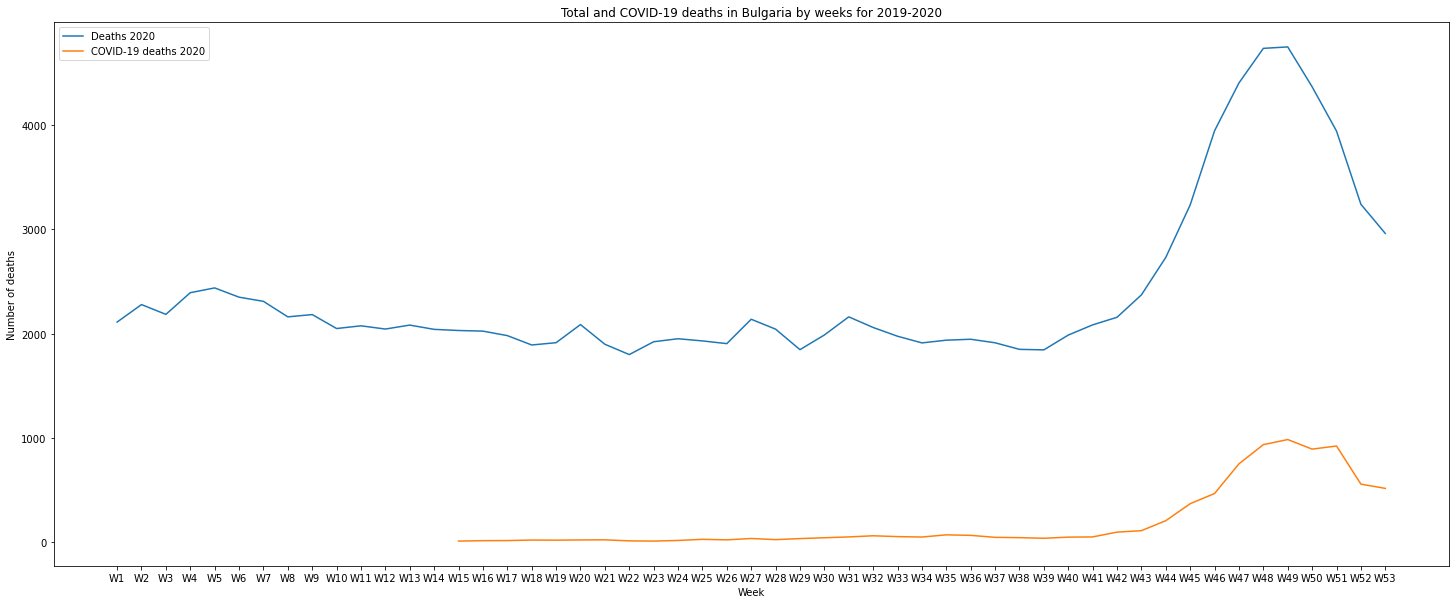

In [80]:
plt.figure(figsize=(25,10))

plt.plot(deaths_data_2016_2021.index, deaths_data_2016_2021['2020'], label='Deaths 2020')
plt.plot(covid_data_2020.index, covid_data_2020['deaths'], label='COVID-19 deaths 2020')

plt.title('Total and COVID-19 deaths in Bulgaria by weeks for 2019-2020')
plt.xlabel('Week')
plt.ylabel('Number of deaths')

plt.legend()
plt.show()

Although it can't be seen for the lower peaks from this plot, the highest peaks for both lines seem to match. Is it because COVID-19 is the reason, and in most cases - the cause, for the peak in total number of deaths in 2020, or is it a mere coincidence?

Let's take the 2020 deaths data from week 15 so that both sets are the same size and see their correlation coefficient.

In [81]:
deaths_data_2020_from_w15 = deaths_data_2016_2021['W15':]['2020']

In [82]:
deaths_data_2020_from_w15.corr(covid_data_2020['deaths'])

0.9721557171322392

#### Forming a hypothesis

We can see that the peaks match on the plot and we can see the strong correlation between the two datasets. But is it really possible that the virus is responsible for the excess deaths in 2020? One way to find out - let's form a hypothesis and test it.

* $H_0:$ COVID-19 is not the cause of the excess deaths in 2020. The high peak in both plot lines appears by chance.
* $H_1:$ COVID-19 is the likely cause of the excess deaths in 2020.

To test if there is a significant difference between the two sets, an independent $t$-test will be performed. The threshold will be the standard 5% or $p=0,05$ and the `equal_var` parameter will be set to __False__ in order to achieve higher accuracy.

In [83]:
test_result = ttest_ind(covid_data_2020['deaths'], deaths_data_2020_from_w15, equal_var=False)

In [84]:
print(f"The p-value from the performed t-test is: {test_result.pvalue}")
if test_result.pvalue <= 0.05:
    print("There is a significant differenc between the two data sets, therefore H0 is rejected.")
else:
    print("The evidence is not enough to reject H0.")

The p-value from the performed t-test is: 2.644181512683949e-19
There is a significant differenc between the two data sets, therefore H0 is rejected.


### Conclusion and future work

Obvious as it might be to some just by visualizing the data, presented here is a statistical proof that in fact COVID-19 is the probable cause of more deaths in 2020. And it comes as no surprise as it is something that has been [reported](https://www.cdc.gov/nchs/nvss/vsrr/covid19/excess_deaths.htm) worldwide.

There are a few notes worth mentioning regarding the data and its analysis. First I would like to point out that there is a difference between the count of deaths from COVID-19 in 2020 in the dataset I have collected and the [officially reported](https://infostat.nsi.bg/infostat/pages/reports/result.jsf?x_2=1829) cases for the same cause and year in the National Statistical Institute. However the expected value for overall deaths in 2020 calculated here, probably should be lower. The reason for that is the decrease in the Bulgarian population over the years which should lead to decrease in overall death as well. Another reason is that even though the total number of deaths has increased due to the virus, I would argue that for some causes of dead it actually lead to a drop of cases. For example because of the lockdowns and people mostly staying home, the number of car crashes has decreased. Because of the restrictions like wearing a mask, keeping high level of personal hygiene, keeping a social distance and limiting overall contacts, the number of cases caused by other viruses, like Influenza, most probably have dropped as well. And let's not forget the closing of kindergartens and schools, which probably reduced further the spread of infections, as the small children are the main vector for that. Keeping all this in mind, it is highly likely that the number of excess deaths is actually higher than the one calculated here.

What can be done further with this data is investigation on a deeper level. By that I mean inspecting the number of deaths in 2020 by cause and pinpointing those causes for which the numbers are significantly higher compared to previous years. Combining this analysis with the analysis of the most prevalent comorbid conditions associated with COVID-19 could give us the actual death rate from the virus. I speculate that in 2020, as it was the beginning of the pandemic, a lot of death cases, and confirmed positive cases for that matter, are underreported.

Another future analysis could include modelling the data to predict future peaks in cases. Or modelling the data to predict the amount of excess deaths which are to be expected this year. It could even be used to create models for guessing what would next year look like, in terms of deaths, if there isn't a virus and if it continues to mutate and spread. Comparisons can be made on the effect of vaccines in countries with low vaccination rates, like ours, and countries with higher rates, like the UK.

The availability of data from all over the world regarding the virus, makes the COVID-19 pandemic an extremely useful tool to analyze and model pandemic behaviour with the goal to one day predict and prevent a similar global disaster.

### Resources
1.	https://www.nature.com/articles/d41586-020-00020-9?utm_source=Nature+Briefing&utm_campaign=1c9065f6a7-briefing-dy-20200109&utm_medium=email&utm_term=0_c9dfd39373-1c9065f6a7-43712633
2.	https://www.who.int/emergencies/disease-outbreak-news/item/2020-DON229
3.	https://www.sciencemag.org/news/2020/01/chinese-researchers-reveal-draft-genome-virus-implicated-wuhan-pneumonia-outbreak?utm_source=Nature+Briefing&utm_campaign=360da68de1-briefing-dy-20200110_COPY_01&utm_medium=email&utm_term=0_c9dfd39373-360da68de1-43712633
4.	https://www.nature.com/articles/d41586-020-00154-w?utm_source=Nature+Briefing&utm_campaign=abdc265fdd-briefing-dy-20200121_COPY_01&utm_medium=email&utm_term=0_c9dfd39373-abdc265fdd-43712633
5.	https://www.who.int/en/activities/tracking-SARS-CoV-2-variants/
6.	https://coronavirus.bg/bg/statistika 
7.	https://coronavirus.bg/bg/news/2255
8.	https://coronavirus.bg/bg/
9.	https://bnr.bg/post/101237668/potvardeni-sa-dva-sluchaa-na-koronavirus-v-balggaria
10.	https://coronavirus.bg/bg/news/41
11.	https://www.dnevnik.bg/bulgaria/2020/11/15/4137950_izlekuvan_ot_covid-19_-_kak_se_broiat_ozdravelite_i/
12.	https://coronavirus.bg/bg/news/1058
13.	https://coronavirus.bg/bg/news/154
14.	https://towardsdatascience.com/daily-to-weekly-pandas-c0557b12f052
15.	https://coronavirus.bg/bg/vaccinations_news/1508
16.	https://www.nsi.bg/bg/content/18121/basic-page/%D1%83%D0%BC%D0%B8%D1%80%D0%B0%D0%BD%D0%B8%D1%8F-%D0%B2-%D0%B1%D1%8A%D0%BB%D0%B3%D0%B0%D1%80%D0%B8%D1%8F-%D0%BF%D0%BE-%D1%81%D0%B5%D0%B4%D0%BC%D0%B8%D1%86%D0%B8
17.	https://www.epochconverter.com/weeks/2020
18.	https://www.cdc.gov/nchs/nvss/vsrr/covid19/excess_deaths.htm
19.	https://infostat.nsi.bg/infostat/pages/reports/result.jsf?x_2=1829
